# <span style="color:red"> Targeted-from-mzML notebook for IODA</span>

**Purpose**: The IODA targeted-from-mzML workflow detects ions to be used as targets for iterative optimised data acquisition (IODA) of fragmentation spectra in LC-MS. The targets are detected in the "reference" sample, and background ions are detected in the "blank" sample. Background ions are excluded from the targets. The targets can be acquired by IODA in one or multiple experiments for higher coverage.

**Usage**: This notebook runs OpenMS processing on two mzML files uploaded by the user. The OpenMS processing performs feature detection/alignment, and outputs an mzTab file with ions/features detected. The IODA-targeted workflow defines the targets, and these are then formatted for XCalibur or [MaxQuant.Live](http://www.maxquant.live/).

**Documentation**: Please refer to the main documentation page for more informations on the OpenMS worklow used. [See here](link).

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Run your LC-MS mass spectrometry experiments

Analyse your reference and "blank" samples by LC-MS.

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed with IODA. Note that there is no need for MS/MS acquisition for the reference and blank, as feature detection/alignment with OpenMS is performed only on the MS1 level. The following IODA-targeted experiments requires MS/MS acquisition.


### Step 1 - Convert from .raw to .mzML file format

You can use the [GNPS Quickstart interface web-interface](https://gnps-quickstart.ucsd.edu/conversion) to convert your .raw file(s) into .mzML file(s). The GNPS documentation provides [instructions](https://ccms-ucsd.github.io/GNPSDocumentation/fileconversion/) for converting MSConvert. Note that the spectra have to be centroided. Download the converted files.


### Step 2 - Upload the mzML files

##### <span style="color:brown">Method 1 - Upload your mzML files</span>

Upload your mzML files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for each files.

### Step 3 - Specify the link or path to the mzML files
Specificy the filename or download link for the mzML files in the cell below. The "blank" sample in *input_BLANK* and the "reference" sample in *input_SAMPLE*. The string for the link/path must be between parenthesis, such as: *"my_reference_sample.mzML"* or *"input_folder/my_reference_sample.mzML"*

In [1]:
# Blank sample
input_BLANK = "Path_to_Blank_mzML_file"
# Reference sample
input_SAMPLE = "Path_to_Reference_mzML_file"

### Step 4 - Set the variables for the OpenMS processing

If needed, change the default values for the OpenMS feature finder/alignement tool depending on your experimental set-up. The *ppm_tolerance* indicates the maximum tolerance for the feature detection/alignement (default is 10 ppm), and the *feature_noise* defines the noise level for the instrument (usually between 1E5-3E6 for Q Exactive).

In [3]:
ppm_error = 10
noise_level = 1E6

### Step 5 - Run the OpenMS workflow

Do not change the cell just below - Just run it to start OpenMS processing.

In [4]:
from IODA_run_OpenMS_targeted import *
IODA_targeted_workflow(input_BLANK,input_SAMPLE,ppm_error,noise_level)

[I 200715 23:54:09 IODA_run_OpenMS_targeted:30] 2020-07-15 23:54:09.186849
[I 200715 23:54:09 IODA_run_OpenMS_targeted:31] STARTING the IODA-targeted WORKFLOW with OpenMS
[I 200715 23:54:09 IODA_run_OpenMS_targeted:32] ======
[I 200715 23:54:09 IODA_run_OpenMS_targeted:33] Path to the input files: 
[I 200715 23:54:09 IODA_run_OpenMS_targeted:34] Blank: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 200715 23:54:09 IODA_run_OpenMS_targeted:35] Sample: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200715 23:54:09 IODA_run_OpenMS_targeted:62] Copying the mzML files ...
[I 200715 23:54:09 IODA_run_OpenMS_targeted:56] Path to uploaded file: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 200715 23:54:09 IODA_run_OpenMS_targeted:56] Path to uploaded file: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200715 23:54:09 IODA_run_OpenMS_targeted:66] ======
[I 200715 23:54:09 IODA_run_OpenMS_targeted:67] Changing the variables of the OpenMS workflow ...
[I 200715 23:54:09 IODA_run_OpenMS_targeted:68]    

### Step 6 - Specify the parameters of the IODA-targeted workflow
Specify the parameter values for IODA-targeted workflow in the cell below:

*min_ratio_value*: minimum ratio for the intensity of an ion/feature (peak height) between the reference and blank samples (reference/blank). Only ions above that ratio will be valid ion targets. (Default = 5).

*min_intensity_value*: the minimum intensity (peak height) of an ion/feature in the reference sample to be considered as valid ion targets. (Default = 1E5).

*experiment_number*: define the number of iterative experiment(s) to perform for the IODA-targeted workflow. If >2, the valid target ions will be splitted into (multiple) experiments (Default = 3, range 1-10)


In [5]:
min_ratio_value = 5
min_intensity_value = 1E5
experiment_number = 3

### Step 7 - Run the IODA-targeted workflow

Simply run the cell below to start the IODA-targeted workflow

In [6]:
from IODA_targeted_workflow import *
make_targeted_list_from_mzTab('OpenMS_generated', experiment_number, min_ratio_value, min_intensity_value)

[I 200715 23:54:20 IODA_targeted_workflow:279] STARTING THE IODA targeted-from-mzTab WORKFLOW
[I 200715 23:54:20 IODA_targeted_workflow:284] The mzTab was generated with the IODA-OpenMS workflow
[I 200715 23:54:20 IODA_targeted_workflow:292] 2020-07-15 23:54:20.722614
[I 200715 23:54:20 IODA_targeted_workflow:295] ======
[I 200715 23:54:20 IODA_targeted_workflow:296] Getting the mzTab
[I 200715 23:54:20 IODA_targeted_workflow:312] This is the input file path: TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 200715 23:54:20 IODA_targeted_workflow:313] This is the output file path: results_targeted/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 200715 23:54:20 IODA_targeted_workflow:317] ======
[I 200715 23:54:20 IODA_targeted_workflow:318] Converting mzTab to intermediate table format ...
[I 200715 23:54:20 IODA_targeted_workflow:73] - For sample Eu

### Step 8 - Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the OpenMS parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

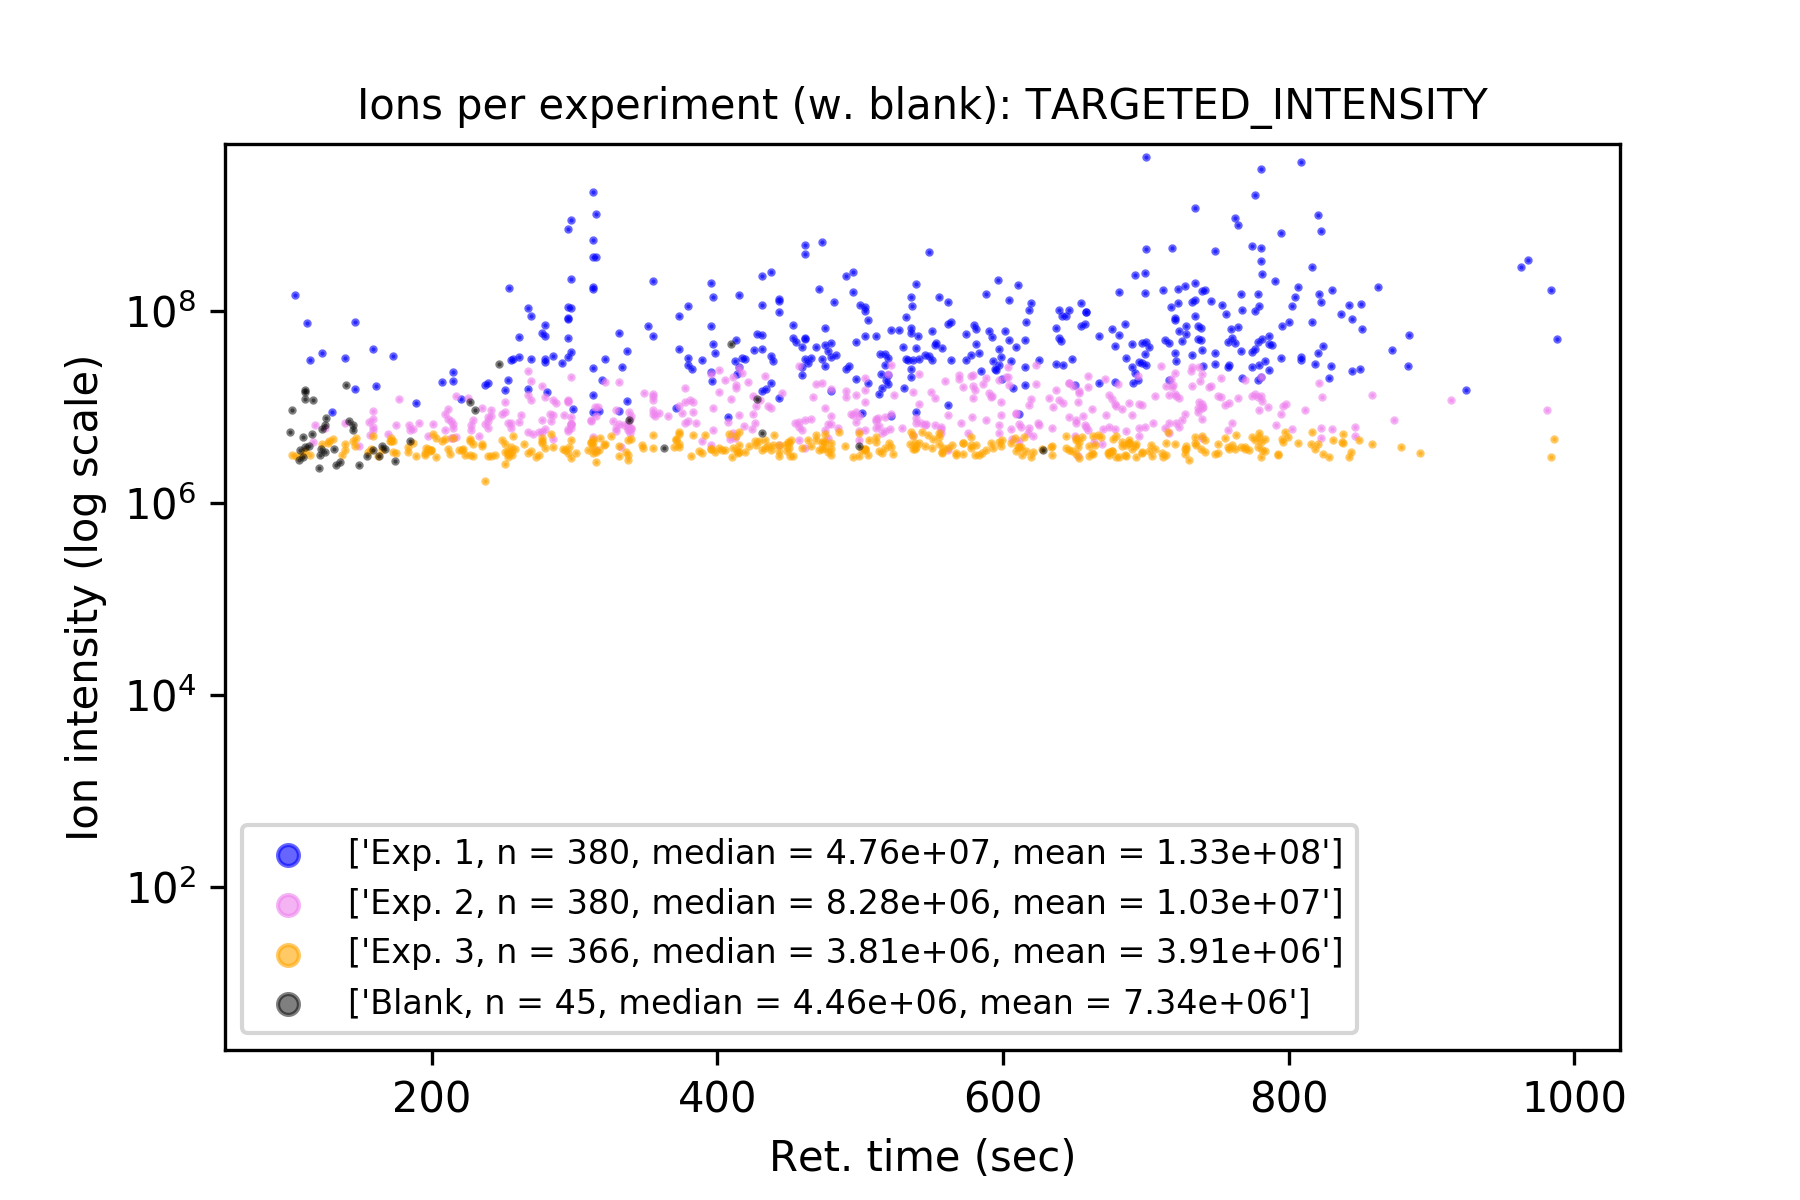

In [7]:
from IPython.display import Image
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_RATIO_scatter_view.png")
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_INTENSITY_scatter_view.png")

### Step 10 - Download the results

Download the IODA-targeted Workflow results ->
[download-results/IODA_targeted_results.zip](download-results/IODA_targeted_results.zip?download=1) (Navigate in the left panel and right-clic on the file icon for download).

(Optional) - Download the OpenMS results file -> 
[download_results/IODA_OpenMS_results.zip](download_results/IODA_OpenMS_results.zip?download=1). You can open the featureXML and consensusXML files with [OpenMS/TOPPView](https://github.com/OpenMS/OpenMS/releases) to inspect the quality of feature detection and alignment.

### Step 11 - Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).